## Problem Statement :

    You have been provided with a banking dataset that contains marketing insights for various
    campaigns that were run for the customers for a duration of time. Using your machine learning
    and analytical skills - provide actionable insights that will be useful for the company to plan
    striking and efficient marketing campaigns for their products.

## Dataset Information:
 
Feature Name                       Description

age                             Age of the customer

job                            Profession of the customer

marital                        Marital status of the customer

education                      Educational qualification of the customer

default                        Does the customer have credit in default?

balance                        Average yearly balance

housing                        Does the customer have a housing loan?

loan                           Does the customer have a personal loan?

contact                        Contact communication type of the customer

day                            Last contact day of the month

month                          Last contact month of the year

duration                       Last contact duration in seconds

campaign                       Number of contacts during campaign

pdays                          Number of days since last contact

previous                       Number of contacts before campaign

poutcome                       Outcome of previous campaign

y                              Has the customer subscribed for a

# Task to be performed
## importing libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import random

import warnings
warnings.filterwarnings('ignore')

In [111]:
btrain = pd.read_csv('train.csv')
btest = pd.read_csv('test.csv')

In [112]:
btrain.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [113]:
#Creating User Columns
df_user = pd.DataFrame(np.arange(0,len(btrain)), columns=['user'])
btrain = pd.concat([df_user, btrain], axis=1)
btrain.head()

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [114]:
print(btrain.shape)
print(btest.shape)

(45211, 18)
(4521, 17)


In [115]:
btrain.describe()

,user,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [116]:
btrain.isnull().sum()

user         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### There is no null values in the given train data

In [117]:
btrain.groupby('y').mean()

,user,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,21197.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,33228.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [118]:
# dataset balanced/notvalidating

btrain['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [119]:
countNo = len(btrain[btrain.y == 'no'])
countYes = len(btrain[btrain.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(btrain.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(btrain.y))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


<Axes: >

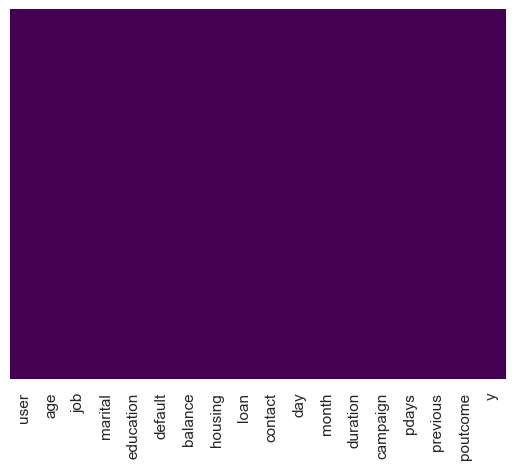

In [120]:
# verifying for null values

sns.heatmap(btrain.isnull(), yticklabels = False, cbar = False,
           cmap = 'viridis')

In [121]:
btrain.isna().any()

user         False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [122]:
btrain.isna().sum()

user         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [123]:
X = btrain.drop(['y','user','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = btrain['y']

In [124]:
X.head()

,age,default,balance,duration,campaign,pdays,previous
0,58,no,2143,261,1,-1,0
1,44,no,29,151,1,-1,0
2,33,no,2,76,1,-1,0
3,47,no,1506,92,1,-1,0
4,33,no,1,198,1,-1,0


In [125]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [126]:
# Get Dummies

X = pd.get_dummies(X)
y=pd.get_dummies(y)

# Dummy variable Trap

## Dummy Variable Trap can influence negatively in our analyses. Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms, one variable can be predicted from the others. 


In [127]:
X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})



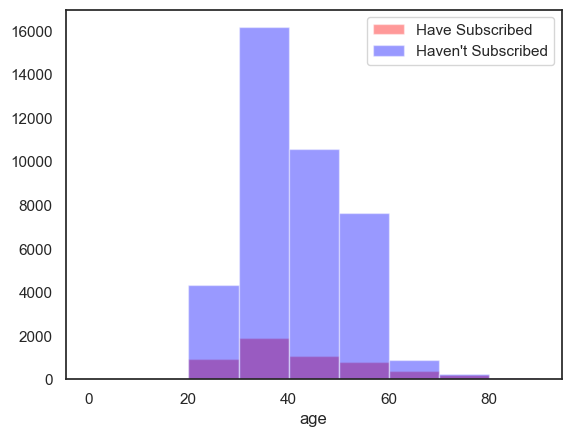

In [128]:
#Age group
bins = range(0, 100, 10)
ax = sns.distplot(btrain.age[btrain.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(btrain.age[btrain.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

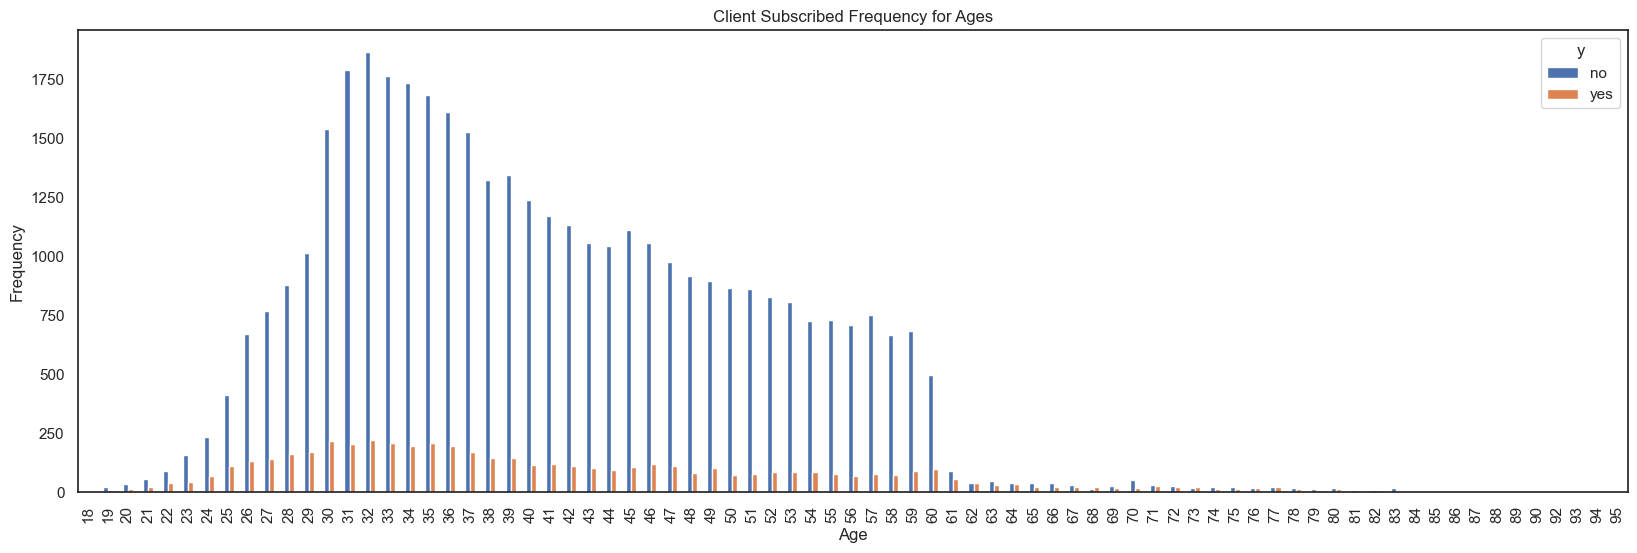

In [129]:
#Age
pd.crosstab(btrain.age,btrain.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

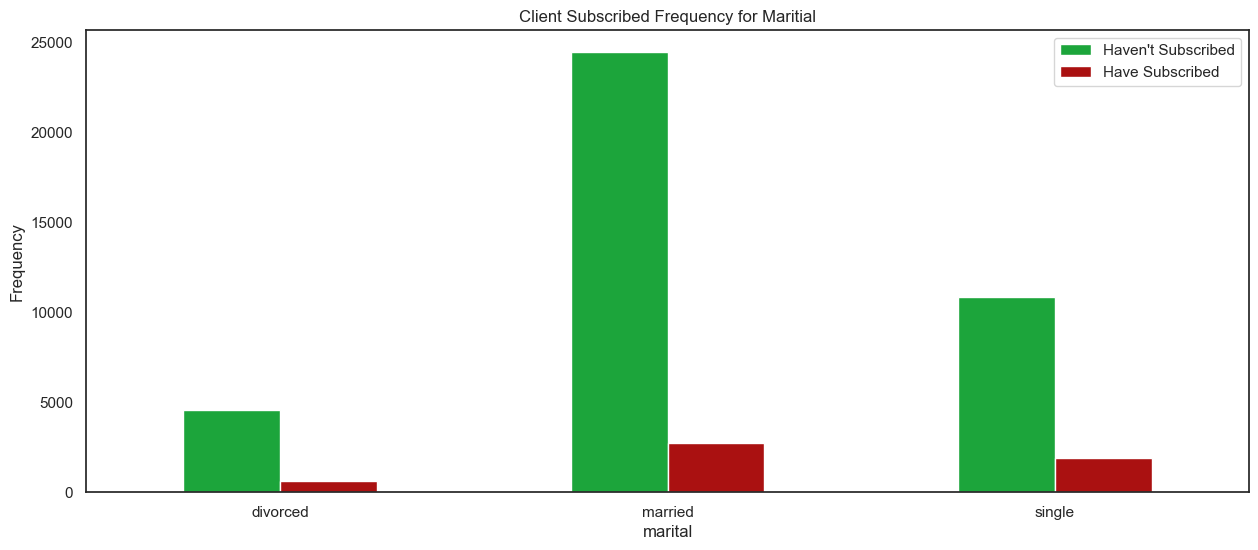

In [130]:
pd.crosstab(btrain.marital,btrain.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

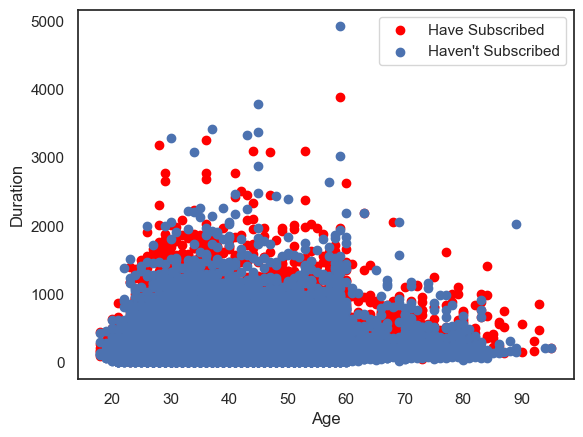

In [131]:
plt.scatter(x=btrain.age[btrain.y=='yes'], y=btrain.duration[(btrain.y=='yes')], c="red")
plt.scatter(x=btrain.age[btrain.y=='no'], y=btrain.duration[(btrain.y=='no')])
plt.legend(["Have Subscribed", "Haven't Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

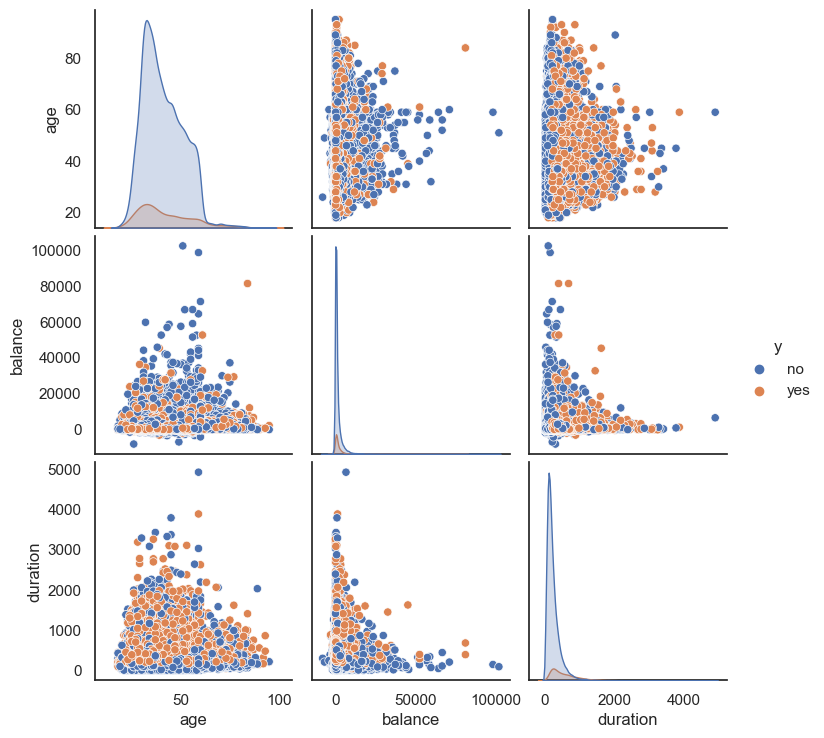

In [132]:
sns.pairplot(data = btrain,hue='y',vars=['age', 'balance', 'duration'])

<Axes: xlabel='y', ylabel='count'>

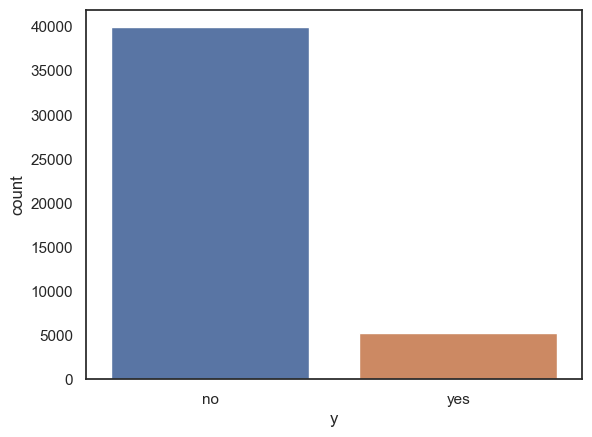

In [133]:
sns.countplot(x='y',data=btrain,label='count')

<Axes: xlabel='age', ylabel='balance'>

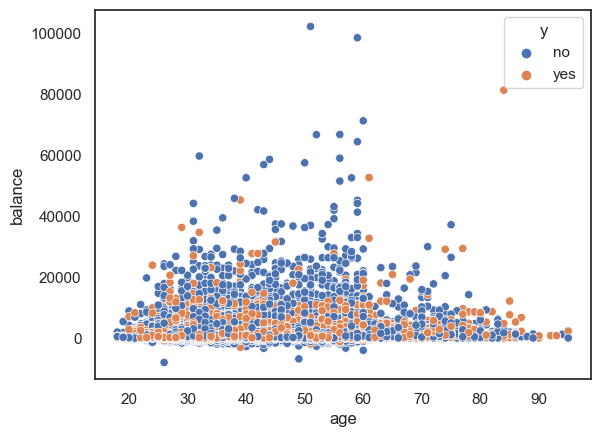

In [134]:
sns.scatterplot(x='age', y='balance',hue='y',data=btrain)

<Axes: >

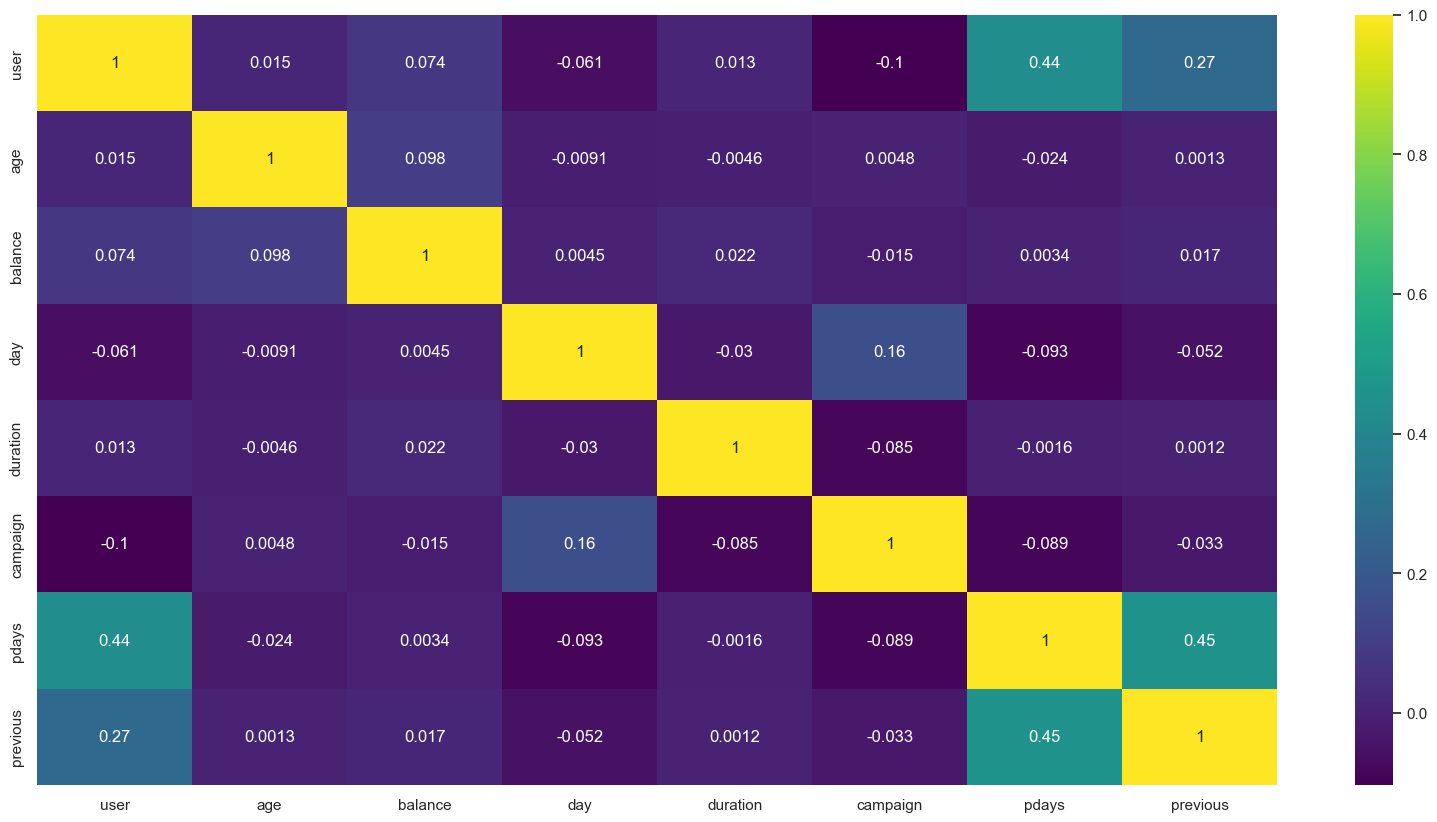

In [135]:
plt.figure(figsize=(20,10))
sns.heatmap(data=btrain.corr(), annot = True,
            cmap = 'viridis')

<Axes: xlabel='age', ylabel='Density'>

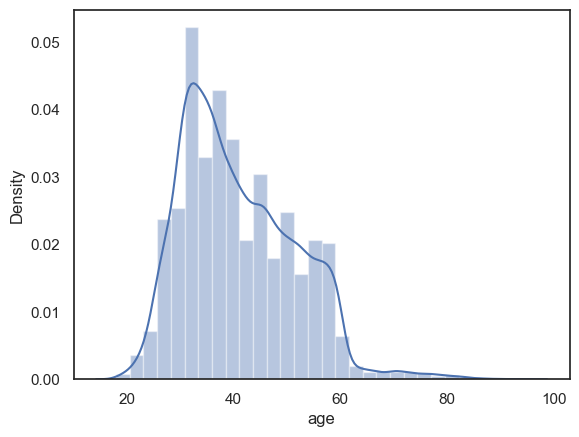

In [136]:
sns.distplot(btrain.age,bins=30)

<Axes: xlabel='balance', ylabel='Density'>

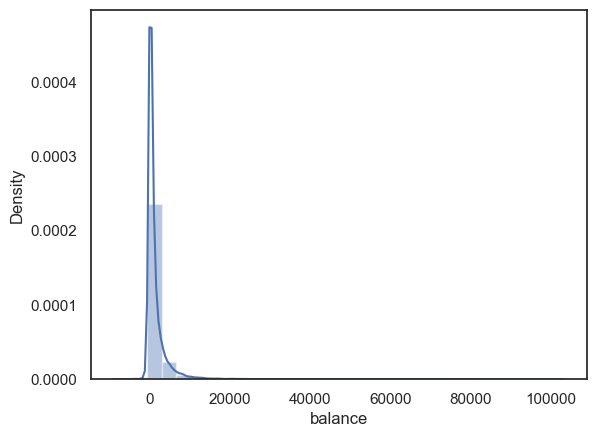

In [137]:
sns.distplot(btrain.balance,bins=30)

<Axes: xlabel='duration', ylabel='Density'>

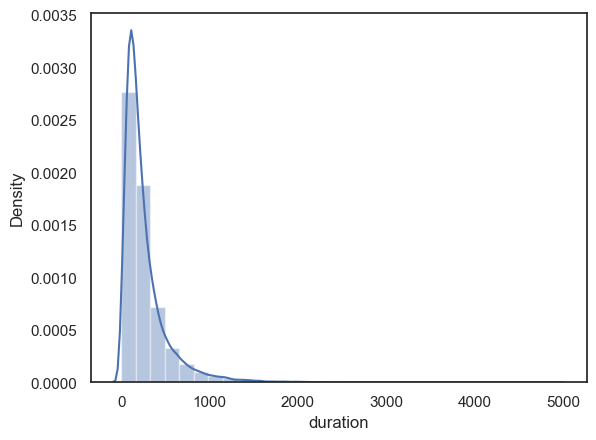

In [138]:
sns.distplot(btrain.duration,bins=30)

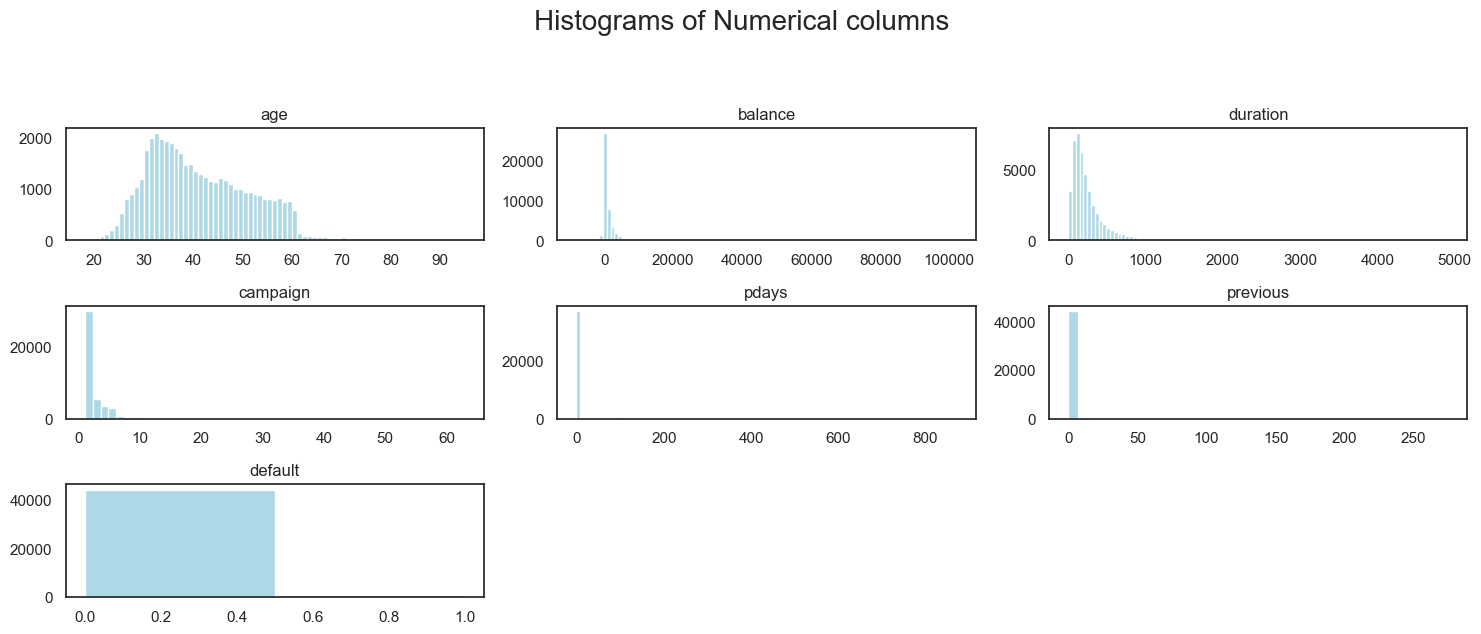

In [139]:
df = X
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical columns', fontsize = 20)
for i in range(df.shape[1]):
    plt.subplot(6,3,i+1)
    f = plt.gca()
    f.set_title(df.columns.values[i])
    
    vals = np.size(df.iloc[:,i].unique())
    if vals >= 100:
        vals = 100
        
    plt.hist(df.iloc[:,i], bins = vals, color = '#ADD8E6')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])


<Axes: title={'center': 'correlation with y'}>

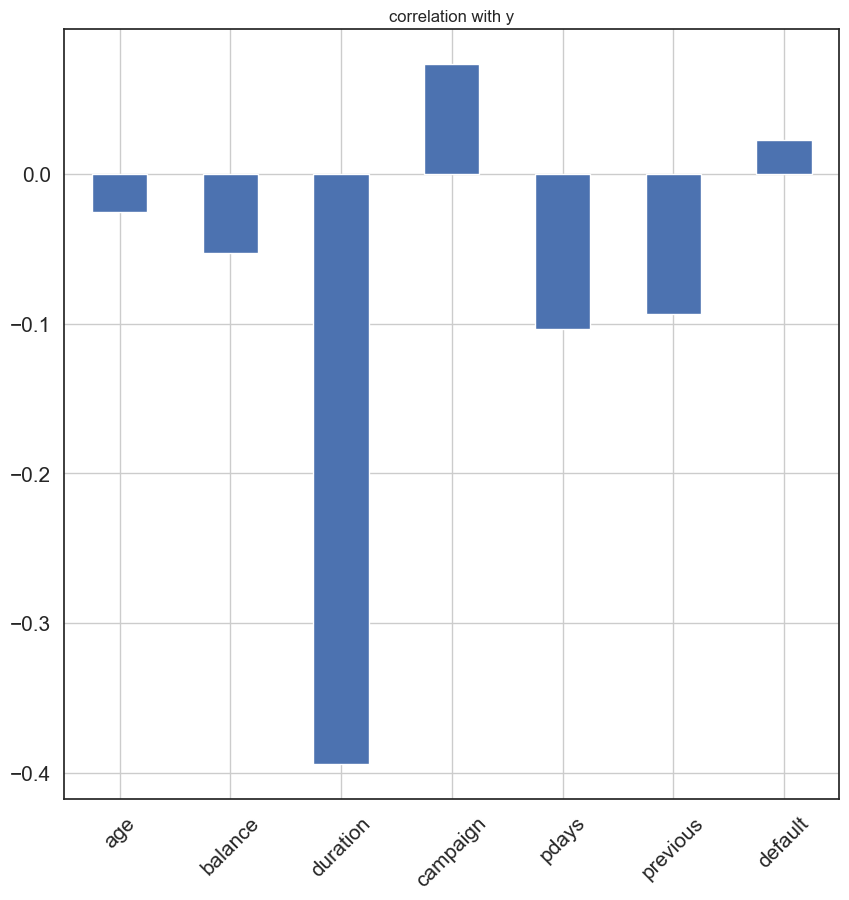

In [140]:
# correlation with independent (y) values

df.corrwith(y.y).plot.bar(figsize = (10,10), 
                         title = "correlation with y",
                         fontsize = 15,
                         rot = 45,
                          
                         grid = True)

<Axes: >

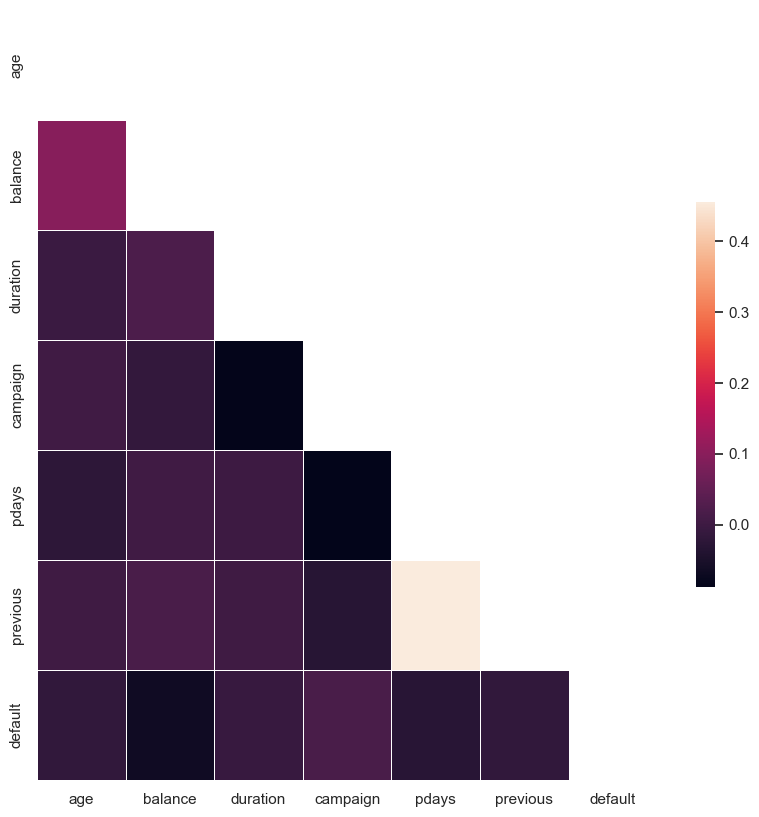

In [141]:
sns.set(style = 'white')
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(10,10))

cmap = sns.diverging_palette(223,10,as_cmap=True)

sns.heatmap(corr, mask = mask,  linewidth = .5, cbar_kws = {'shrink':.5})

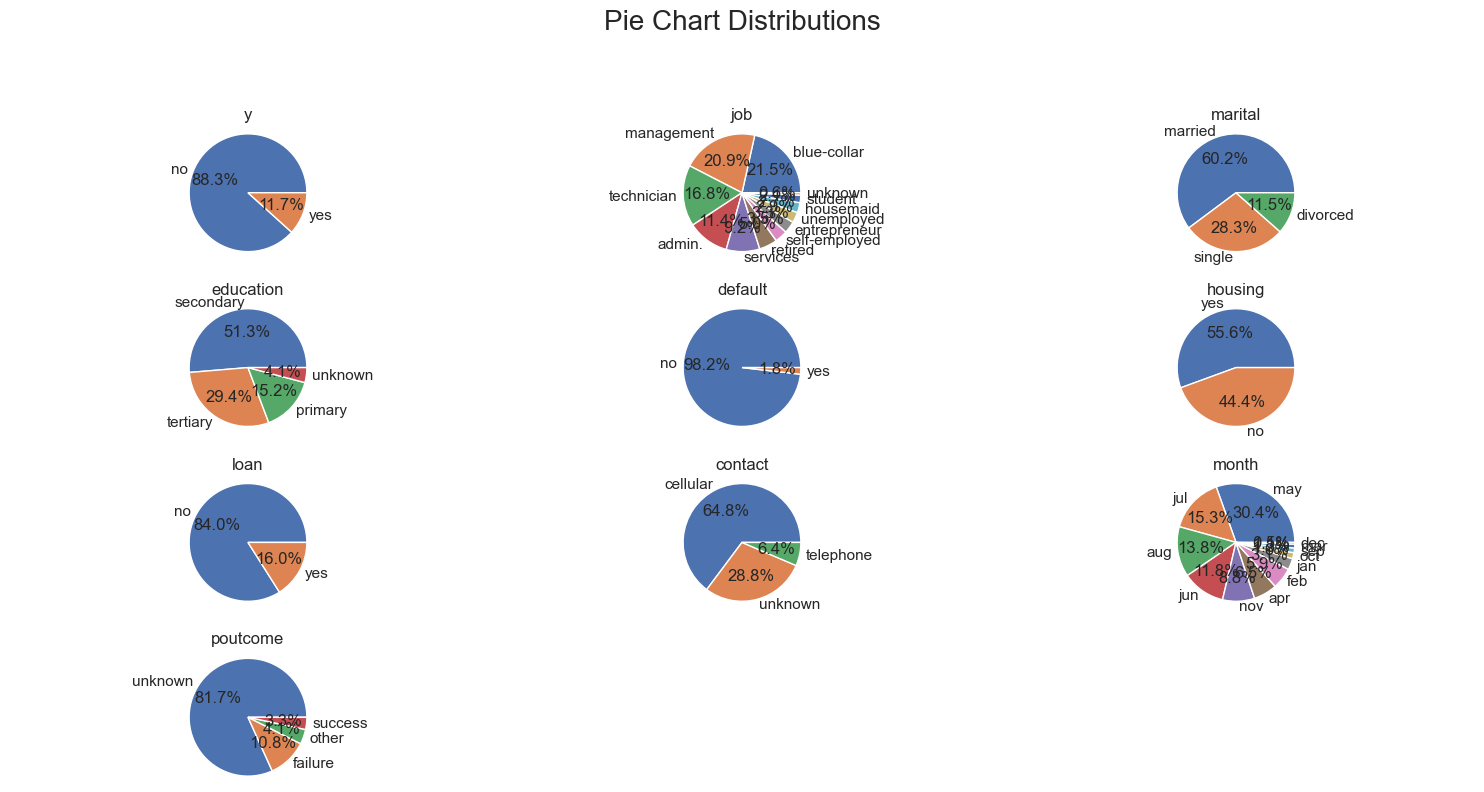

In [142]:
## Pie Plots
btrain.columns
df = btrain[['y','job','marital', 'education', 'default', 'housing','loan', 'contact',
             'month', 'poutcome'
                    ]]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df.columns.values[i - 1])
   
    values = df.iloc[:, i - 1].value_counts(normalize = True).values
    index = df.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# splitting dataset into train and test data

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20,stratify = y)

In [144]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 7)
(9043, 7)
(36168, 1)
(9043, 1)


In [145]:
y_train['y'].value_counts()

1    31937
0     4231
Name: y, dtype: int64

In [146]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [147]:
y_train['y'].value_counts()

0    4231
1    4231
Name: y, dtype: int64

# Feature scaling

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))
X_train.columns = X_train.columns.values
X_test.columns = X_test.columns.values
X_train.index = X_train.index.values
X_test.index = X_test.index.values
X_train = X_train
X_test = X_test

# Model Building

### Logistic Regresion model

In [149]:
from sklearn.linear_model import LogisticRegression
linearclassifier = LogisticRegression(random_state = 20, penalty = 'l1', solver='liblinear')
linearclassifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = linearclassifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

linearresults = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

## K Nearest neighbours(KNN)

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p= 2)
knnclassifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = knnclassifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

knnmodel_results = pd.DataFrame([['K-Nearest Neighbors (minkowski)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

knnresults = results.append(knnmodel_results, ignore_index = True)

## SVM(Linear)

In [157]:
from sklearn.svm import SVC
svcclassifier = SVC(random_state = 0, kernel = 'linear', probability= True)
svcclassifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = svcclassifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svcmodel_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

svc_results = results.append(svcmodel_results, ignore_index = True)

## SVM (rbf kernel)

In [178]:

from sklearn.svm import SVC
svcrbfclassifier = SVC(random_state = 20, kernel = 'rbf', probability= True)
svcrbfclassifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = svcrbfclassifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svcrbfmodel_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
svcrbfresults = results.append(svcrbfmodel_results, ignore_index = True)

## Naive bayes

In [161]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = nbclassifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

nbmodel_results = pd.DataFrame([['Naive Bayes (Gaussian)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

nbresults = results.append(nbmodel_results, ignore_index = True)

## Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion='entropy', random_state=20)
dtclassifier.fit(X_train, y_train)

#Predicting the best set result
y_pred = dtclassifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

dtmodel_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(dtmodel_results, ignore_index = True)

## randomForest (Gini = 100)

In [180]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier100 = RandomForestClassifier(random_state = 20, n_estimators = 100,
                                    criterion = 'gini')
rfclassifier100.fit(X_train, y_train)

# Predicting Test Set
y_pred = rfclassifier100.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rf100model_results = pd.DataFrame([['Random Forest Gini (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(rf100model_results, ignore_index = True)

## Random forest (gini  200)

In [181]:
rfclassifier200 = RandomForestClassifier(random_state = 20, n_estimators = 200,
                                    criterion = 'gini')
rfclassifier200.fit(X_train, y_train)

# Predicting Test Set
y_pred = rfclassifier200.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rf200model_results = pd.DataFrame([['Random Forest Gini (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(rf200model_results, ignore_index = True)

## Random forest (gini 300)

In [182]:
rfclassifier300 = RandomForestClassifier(random_state = 20, n_estimators = 300,
                                    criterion = 'gini')
rfclassifier300.fit(X_train, y_train)

# Predicting Test Set
y_pred = rfclassifier300.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rf300_model_results = pd.DataFrame([['Random Forest Gini (n=200)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(rf300_model_results, ignore_index = True)

## Random Forest Entropy (n=100)

In [183]:
rfeclassifier100 = RandomForestClassifier(random_state = 20, n_estimators = 100,
                                    criterion = 'entropy')
rfeclassifier100.fit(X_train, y_train)

# Predicting Test Set
y_pred = rfeclassifier100.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rfe_model_results = pd.DataFrame([['Random Forest Entropy (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(rfe_model_results, ignore_index = True)

## Random Forest Entropy (n= 200)

In [184]:
rfeclassifier200 = RandomForestClassifier(random_state = 20, n_estimators = 200,
                                    criterion = 'entropy')
rfeclassifier200.fit(X_train, y_train)

# Predicting Test Set
y_pred = rfeclassifier200.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rfe2_model_results = pd.DataFrame([['Random Forest Entropy (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(rfe2_model_results, ignore_index = True)

## Random forest Entropy (n = 300)

In [185]:
rfeclassifier300 = RandomForestClassifier(random_state = 20, n_estimators = 300,
                                    criterion = 'entropy')
rfeclassifier300.fit(X_train, y_train)

# Predicting Test Set
y_pred = rfeclassifier300.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rfe3_model_results = pd.DataFrame([['Random Forest Entropy (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(rfe3_model_results, ignore_index = True)

In [186]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.779277,0.948077,0.793488,0.863921
1,Decision Tree,0.708061,0.949689,0.706825,0.810454
2,Random Forest Gini (n=100),0.761252,0.965187,0.756919,0.848459
3,Random Forest Gini (n=100),0.761252,0.965187,0.756919,0.848459
4,Random Forest Gini (n=200),0.765896,0.964682,0.762805,0.851948
5,Random Forest Gini (n=200),0.764127,0.964592,0.760802,0.850662
6,Random Forest Entropy (n=100),0.766007,0.966164,0.761678,0.851821
7,Random Forest Entropy (n=100),0.766117,0.965725,0.762179,0.851963
8,Random Forest Entropy (n=100),0.764680,0.965210,0.760927,0.850980
9,Decision Tree,0.706845,0.950507,0.704696,0.809349


## The SVM (Linear) was the most powerful method for our model as shown above.

## Applying K-fold validation

In [189]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=10)
accuracies.mean()
accuracies.std()

0.017310210775951594

In [190]:
print("SVM (Linear) Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM (Linear) Accuracy: 0.747 (+/- 0.035)


Test Data Accuracy: 0.7671


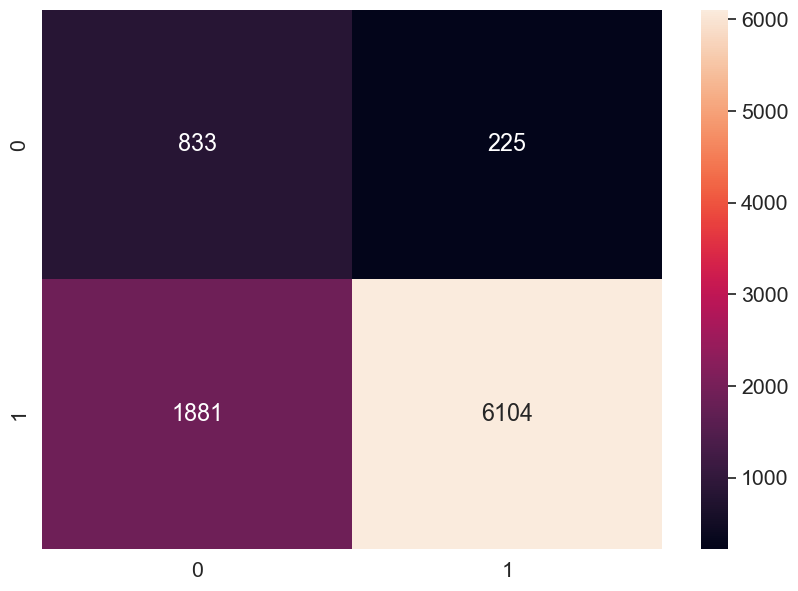

In [192]:
## Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

## Accuracy Paradox
Accuracy is not the best way to measure a perfomance of model. It´s because Accuracy Paradox.

But we will use  the Cumulative Accuracy Profile (CAP)

##   Cumulative Accuracy Profile (CAP)

In [193]:
#Plotting Cumulative Accuracy Profile (CAP)
y_pred_proba = classifier.predict_proba(X=X_test)
import matplotlib.pyplot as plt
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
     
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()

      0         1
0   1.0  0.999666
1   1.0  0.999596
2   1.0  0.999382
3   1.0  0.999169
4   1.0  0.998845
5   1.0  0.998666
6   1.0  0.998257
7   1.0  0.998047
8   1.0  0.997915
9   1.0  0.997760
10  1.0  0.997554
11  1.0  0.997530
12  1.0  0.997505
13  1.0  0.997299
14  1.0  0.997236
15  1.0  0.996984
16  1.0  0.996829
17  1.0  0.996769
18  1.0  0.996644
19  1.0  0.996627


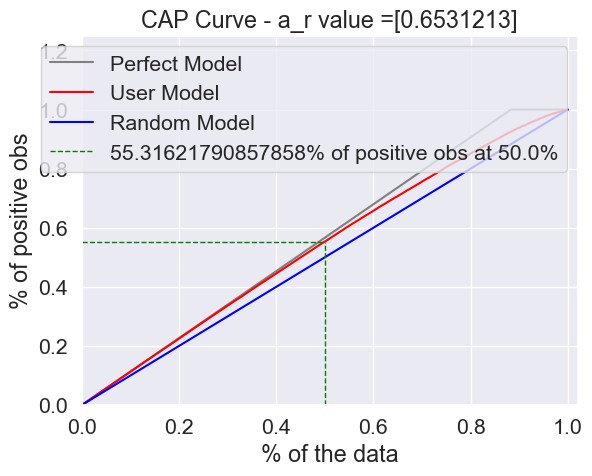

In [194]:
capcurve(y_test, y_pred_proba[:,1])

Note how the CAP result was much smaller than Accuracy result. CAP (55.25%) versus Accuracy (75.54%). Definitely the Accuracy Paradox influence negatively the model.

In [195]:
## Analyzing coefficients

pd.concat([pd.DataFrame(X_train.columns, columns = ['features']),
          pd.DataFrame(np.transpose(classifier.coef_),columns = ['coef'])],
          axis=1)

,features,coef
0,0,-0.067080
1,1,-0.214610
2,2,-1.637583
3,3,0.426182
4,4,-0.217550
5,5,-0.332194
6,6,0.086197


## Feature Selection
### Recursive Feature Elimination

For feature selection, we wil use the Recursive Feature Elimination (RFE)

In [196]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Model to Test
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)

# Select Best X Features
rfe = RFE(classifier, n_features_to_select=None)
rfe = rfe.fit(X_train, y_train)

In [197]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False  True False]
[4 3 1 1 2 1 5]


In [198]:
X_train.columns[rfe.support_]

Int64Index([2, 3, 5], dtype='int64')

<Axes: >

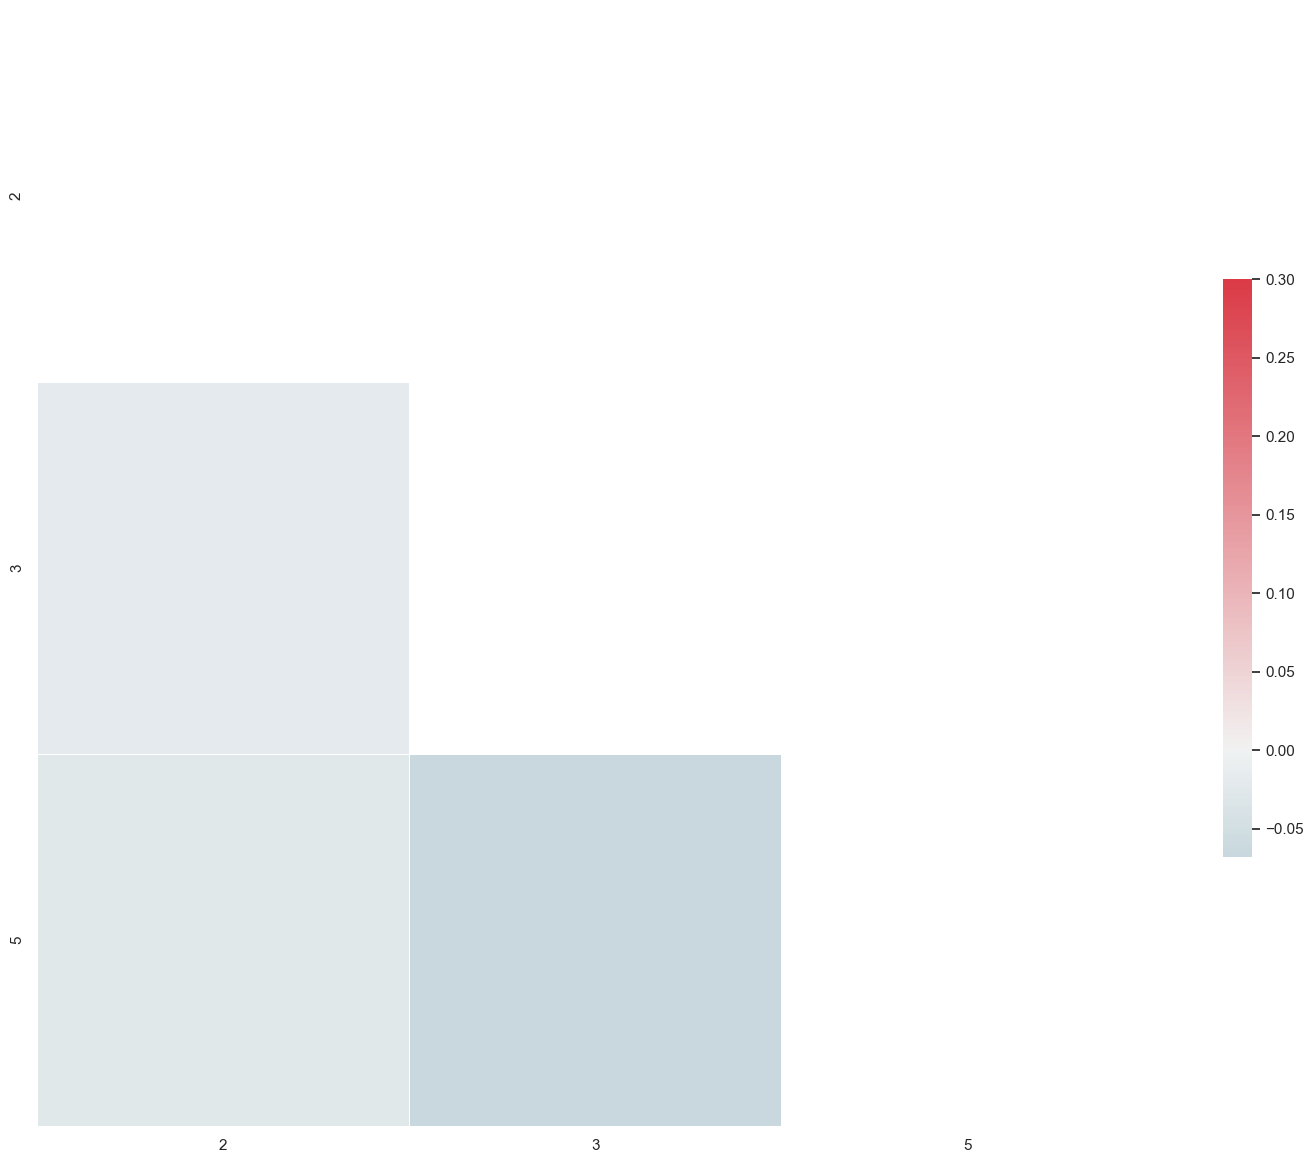

In [199]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})    

In [200]:
# Fitting Model to the Training Set
classifier = SVC(random_state = 0, kernel = 'linear', probability= True)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM RFE (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [201]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.779277,0.948077,0.793488,0.863921
1,Decision Tree,0.708061,0.949689,0.706825,0.810454
2,Random Forest Gini (n=100),0.761252,0.965187,0.756919,0.848459
3,Random Forest Gini (n=100),0.761252,0.965187,0.756919,0.848459
4,Random Forest Gini (n=200),0.765896,0.964682,0.762805,0.851948
5,Random Forest Gini (n=200),0.764127,0.964592,0.760802,0.850662
6,Random Forest Entropy (n=100),0.766007,0.966164,0.761678,0.851821
7,Random Forest Entropy (n=100),0.766117,0.965725,0.762179,0.851963
8,Random Forest Entropy (n=100),0.764680,0.965210,0.760927,0.850980
9,Decision Tree,0.706845,0.950507,0.704696,0.809349


### Taking off some features, our model decreases a little bit the Accuracy as shown above

<Axes: >

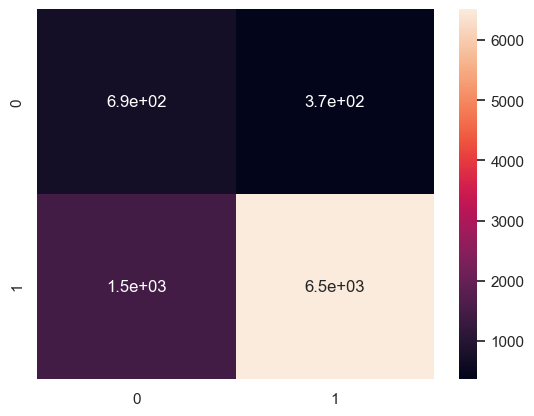

In [203]:
# Evaluating Results
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm, annot=True)

In [204]:
#Making the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.65      0.43      1058
           1       0.95      0.82      0.88      7985

    accuracy                           0.80      9043
   macro avg       0.63      0.73      0.65      9043
weighted avg       0.87      0.80      0.82      9043



In [205]:
# Applying k-Fold Cross Validation (RFE)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)

In [206]:
print("SVM RFE (Linear) Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM RFE (Linear) Accuracy: 0.743 (+/- 0.034)


In [207]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1) 

,features,coef
0,2,-1.455656
1,3,0.233977
2,5,-0.572187


      0         1
0   1.0  0.994363
1   1.0  0.993705
2   1.0  0.991749
3   1.0  0.990627
4   1.0  0.988781
5   1.0  0.987992
6   1.0  0.987293
7   1.0  0.985797
8   1.0  0.985127
9   1.0  0.984017
10  1.0  0.983779
11  1.0  0.983524
12  1.0  0.982943
13  1.0  0.982570
14  1.0  0.981641
15  1.0  0.981273
16  1.0  0.981044
17  1.0  0.980862
18  1.0  0.979440
19  1.0  0.979351


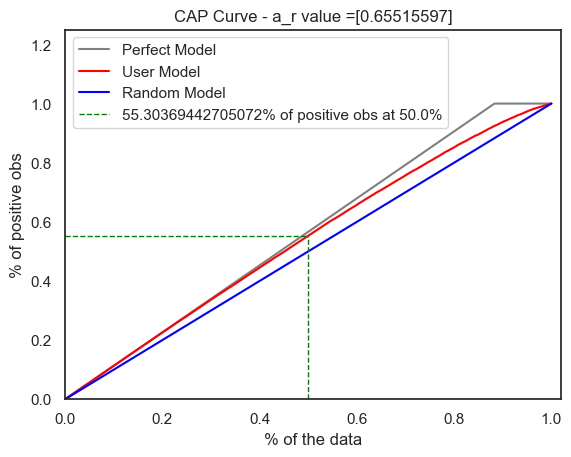

In [208]:
#CAP Curve
y_pred_proba = classifier.predict_proba(X=X_test[X_train.columns[rfe.support_]])
capcurve(y_test,y_pred_proba[:,1])  

In [210]:
### End of Model ####

# Formatting Final Results
user_identifier = btrain['user']
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted'] = y_pred
final_results = final_results[['user', 'y', 'predicted']].reset_index(drop=True)

In [211]:
final_results.head()

,user,y,predicted
0,4142,1.0,1
1,38357,1.0,1
2,13321,1.0,1
3,36359,1.0,0
4,36173,0.0,0


#### As observed, the Bank Marketing Dataset is unbalanced. And so become tough to perform pretty well the model. Another issue was the Accuracy Paradox that provides a false Accuracy final result. Nevertheless, the Cumulative Accuracy Profile showed that our model is performing very worst. For this case, perhaps more data can help balance the dataset and trying to find one best final result. Perfomance of Model Accuracy: 79.65% Cumulative Accuracy Profile: 55.30%